In [1]:
import os, sys
import sklearn
import skimage
from skimage import io
import numpy as np

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
ROOT_PATH = "/home/anuj/data/"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

In [4]:
images_list, labels_list = load_data(train_data_directory)

In [5]:
images = np.array(images_list)
labels = np.array(labels_list)

In [6]:
# Print the `images` dimensions
print(images.ndim)

# Print the number of `images`'s elements
print(images.size)

# Print the first instance of `images`
images[0]

1
4575


array([[[125, 107,  87],
        [121, 106,  90],
        [119, 108,  94],
        ...,
        [103, 111, 100],
        [108, 116, 105],
        [112, 115, 104]],

       [[151, 115,  96],
        [149, 114,  98],
        [147, 115, 102],
        ...,
        [106, 108,  97],
        [108, 108,  98],
        [108, 105,  95]],

       [[181, 128, 108],
        [178, 127, 109],
        [175, 127, 112],
        ...,
        [109, 102,  90],
        [108,  99,  88],
        [105,  95,  84]],

       ...,

       [[255, 255, 254],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [255, 254, 254],
        [254, 255, 254],
        [255, 255, 254]],

       [[255, 255, 255],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [254, 255, 254],
        [255, 255, 255]]

In [7]:
# Print the `labels` dimensions
print(labels.ndim)

# Print the number of `labels`'s elements
print(labels.size)

# Count the number of labels
print(len(set(labels)))

1
4575
62


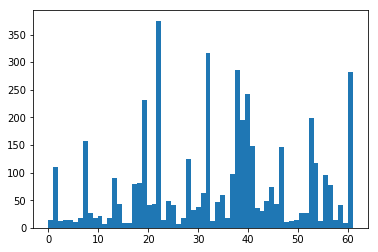

In [8]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

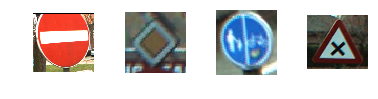

In [9]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

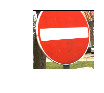

shape: (440, 457, 3), min: 0, max: 255


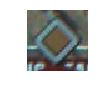

shape: (49, 49, 3), min: 25, max: 233


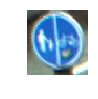

shape: (62, 58, 3), min: 5, max: 255


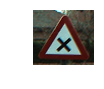

shape: (109, 122, 3), min: 0, max: 255


In [10]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

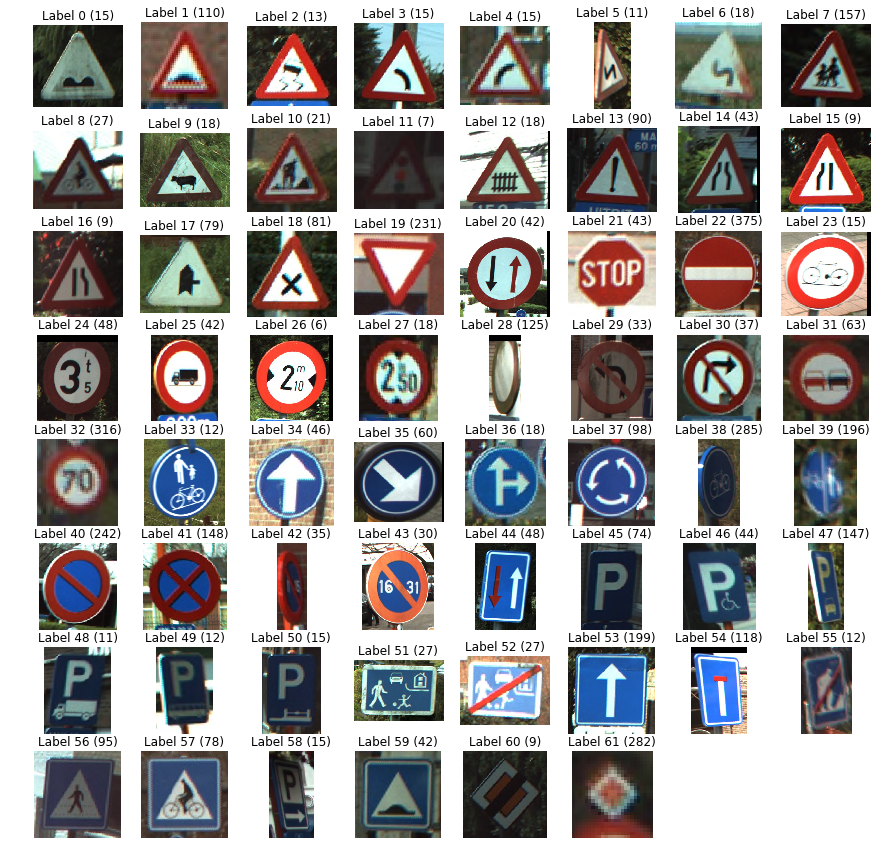

In [11]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels_list.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels_list.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [12]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]


/home/anuj/.virtualenvs/video-analytics-2/local/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/anuj/.virtualenvs/video-analytics-2/local/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [13]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

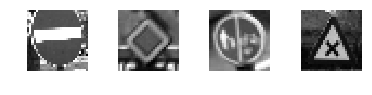

In [14]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [15]:
# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

/home/anuj/.virtualenvs/video-analytics-2/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)


('images_flat: ', <tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>)


In [26]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(10):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels_list})
        if i % 10 == 0:
            print("Loss: ", accuracy_val)
print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss: ', 31.263607)
('EPOCH', 1)
('EPOCH', 2)
('EPOCH', 3)
('EPOCH', 4)
('EPOCH', 5)
('EPOCH', 6)
('EPOCH', 7)
('EPOCH', 8)
('EPOCH', 9)
DONE WITH EPOCH


[19, 53, 41, 18, 47, 22, 28, 22, 7, 54]
[38 38 40 22 32 22 32 32 22 22]


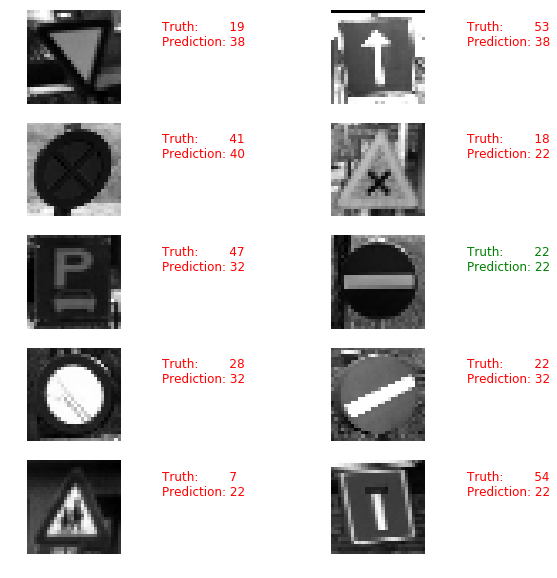

In [27]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [18]:
sess.close()